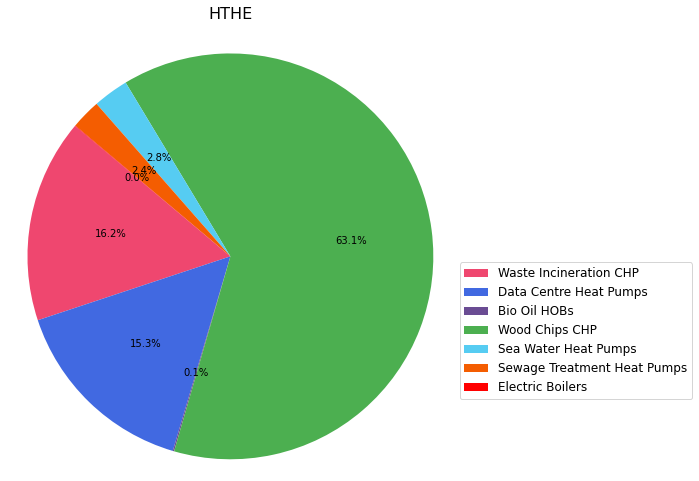

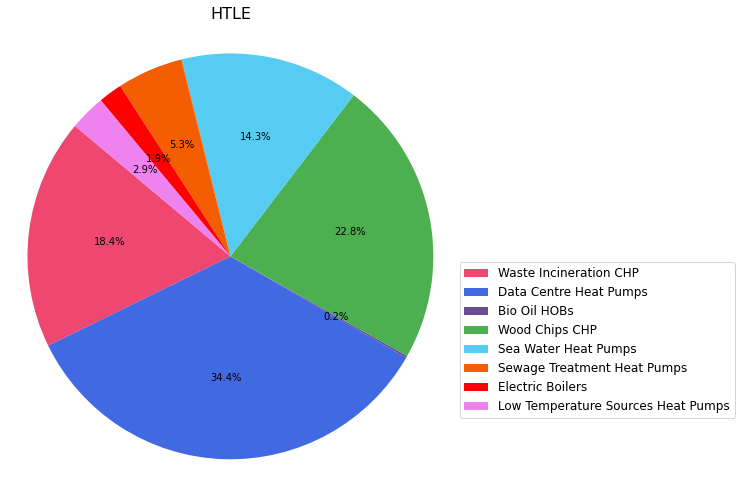

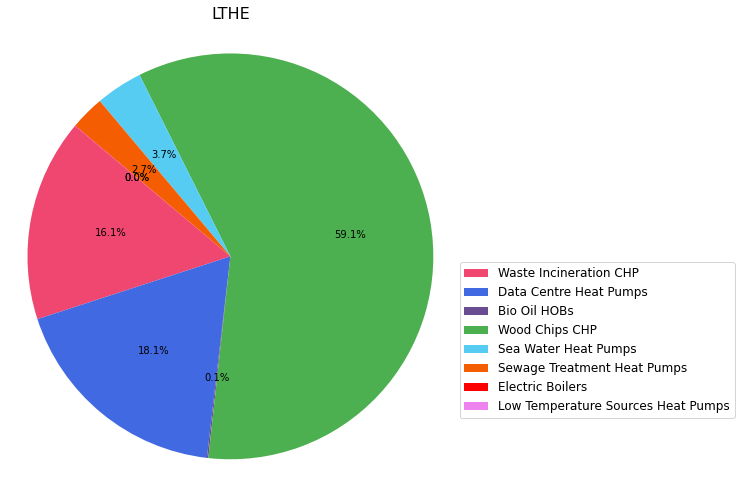

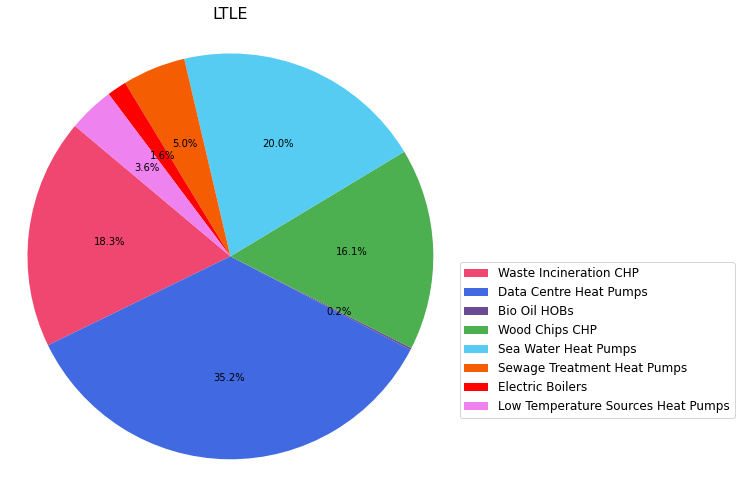

In [2]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Prod_by_tech_ann'
Plotdf = pd.DataFrame()
Plotdf['Year'] = range(2023, 2050) 
# List all files in the directory
file_names = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]

for i in file_names:
    if '.xlsx' in i:
        PBTA = pd.read_excel(i)
        PBTA = PBTA.loc[PBTA['FUEL'].str.contains('CONVHEAT', case=False, na=False)]
        PBTA = PBTA[~PBTA['TECHNOLOGY'].str.contains('DHN')]
        pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
        pivot_PBTA = (pivot_PBTA * 0.27777778).round(0)
        pivot_PBTA.index.name = None
        pivot_PBTA_reset = pivot_PBTA.reset_index()
        pivot_PBTA_reset.rename(columns={'index': 'Year'}, inplace=True)
        pivot_PBTA_reset['Share of Excess heat'] = (pivot_PBTA_reset['DCACC'] + pivot_PBTA_reset['HmrbySEWHP'] + pivot_PBTA_reset['SEWACC'] + pivot_PBTA_reset['SUPACC'] + pivot_PBTA_reset['VVNHP'])/ (pivot_PBTA_reset.sum(axis=1)-pivot_PBTA_reset['Year'])
        j = re.sub('ProdByTechAnn_', '', i, flags=re.IGNORECASE)
        j = re.sub('.xlsx', '', j, flags=re.IGNORECASE)
        Plotdf[j] = pivot_PBTA_reset['Share of Excess heat']

        Names={
        'Waste Incineration CHP': ['BristaB2', 'HgldP3468', 'LSVTACHP'],
        'Data Centre Heat Pumps': ['DCACC'],
        'Bio Oil CHP': ['KVV1'],
        'Bio Oil HOBs': ['DECFOHOB', 'CSBOHOB'],
        'Bio Pellets CHP': ['HslbyP1toP3'],
        'Wood Chips CHP': ['BristaB1', 'KVV8'],
        'Sea Water Heat Pumps': ['VVNHP'],
        'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
        'Electric Boilers': ['VVHVELHOB'],
        'Low Temperature Sources Heat Pumps': ['SUPACC'],
        'Year': ['Year']
    }

        grouped_data = {}
        for category, columns in Names.items():
            # Sum the values for the specified columns in each category
            grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1)
        grouped_df = pd.DataFrame(grouped_data)
        # Define the years of interest
        
        years_of_interest = [2049]

        technology_colors5 = {
            'Electric Boilers': '#FF0000',          # Coral Red
            'Data Centre Heat Pumps': '#4169E1',    # Turquoise
            'Bio Oil CHP': '#FFDA79',               # Bright Yellow
            'Bio Oil HOBs': '#6A4C93',              # Vivid Purple
            'Bio Pellets CHP': '#D3D3D3',           # Peach Orange
            'Sea Water Heat Pumps': '#56CCF2',      # Bright Sky Blue
            'Sewage Treatment Heat Pumps': '#F45D01', # Bright Orange
            'Low Temperature Sources Heat Pumps': '#EE82EE',  # Pale Green
            'Waste Incineration CHP': '#EF476F',    # Pinkish Red
            'Wood Chips CHP': '#4CAF50'             # Bright Mint Green
        }

        # Loop over the specific years
        for year in years_of_interest:
            row_index = grouped_df[grouped_df['Year'] == year].index[0]  # Get the row index for the specific year
            row_data = grouped_df.iloc[row_index]  # Get the row data

            # Prepare data for pie chart
            labels = row_data.index[:-1]  # Exclude 'Year' from labels
            sizes = row_data[:-1]  # Exclude the 'Year' value

            # Filter sizes and labels to exclude 0% values
            non_zero_indices = sizes > 0  # Create a boolean mask for non-zero sizes
            sizes = sizes[non_zero_indices]  # Keep only non-zero sizes
            labels = labels[non_zero_indices]  # Keep corresponding labels for non-zero sizes

            # Create pie chart with custom colors
            plt.figure(figsize=(8, 8))
            plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=140, 
                    colors=[technology_colors5[label] for label in labels])  # Use custom colors
            
            # Add a legend outside the plot
            plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5), fontsize=12)
            
            # Adjust title position by increasing the y-position
            plt.title(f'{j}', fontsize=16, pad=20)
            plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

            # Save the pie chart
            plt.savefig(f'{j}.png', format='png', dpi=800, bbox_inches="tight")

            # Show the pie chart
            plt.show()
        
#         grouped_df.set_index('Year', inplace=True)
#         # Plot area graph
#         ax = grouped_df.plot(kind='area', alpha=0.7, figsize=(10, 6),
#                             color=[technology_colors5[col] for col in grouped_df.columns], linewidth=0.1,)



#         # Remove edge colors by making them transparent
#         for patch in ax.patches:
#             patch.set_edgecolor('black')  # Set edge color to transparent
#             patch.set_linewidth(0)               # Ensure linewidth is 0
#         # Overlay with semi-transparent white to create a gloss effect
#         for patch in ax.patches:
#             patch.set_facecolor(patch.get_facecolor())
#             # Adding gloss effect with a semi-transparent white layer
#             gloss = plt.Rectangle((patch.get_x(), patch.get_y() + patch.get_height() * 0.5), 
#                                 patch.get_width(), patch.get_height() * 0.5, 
#                                 color='white', alpha=0.5, zorder=10)
#             ax.add_patch(gloss)

#         # Add labels and title
#         plt.title(f'Annual of heat generation for scenario {j}', fontsize=16)
#         plt.xlabel('Year', fontsize=14)  # Corrected to 'Year'
#         plt.ylabel('Heat Generation (GWh)', fontsize=14)
#         plt.legend(title='Technologies')
#         plt.xticks(fontsize=12)
#         plt.yticks(fontsize=12)
#         plt.xlim(2023, 2049)

#         # Move the legend to the bottom as a horizontal box
#         plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)

#         plt.grid(False)

#         # Show plot
#         plt.savefig(f'PBTA_{j}.jpg', bbox_inches='tight', dpi=800)
#         plt.show()

# # Plotting
# plt.figure(figsize=(12, 6))

# # Plot each line
# plt.plot(Plotdf['Year'], Plotdf['HTLE'] * 100, marker='o', label='HTLE', linestyle='-')
# plt.plot(Plotdf['Year'], Plotdf['LTHE'] * 100, marker='s', label='LTHE', linestyle='-')
# plt.plot(Plotdf['Year'], Plotdf['LTLE'] * 100, marker='^', label='LTLE', linestyle='-')
# #plt.plot(Plotdf['Year'], Plotdf['HTHE'] * 100, marker='^', label='LTLE', linestyle='-')

# # Set labels and title
# plt.xlabel('Year', fontsize=14)
# plt.ylabel('Values (%)', fontsize=14)
# plt.title('Share of Excess Heat Over Years in different scenarios', fontsize=16)

# # Set the font size for ticks
# plt.xticks(fontsize=12)  # Change 12 to your desired font size
# plt.yticks(fontsize=12)  # Change 12 to your desired font size

# # Set y-axis limit if necessary
# plt.ylim(0, 100)  # Adjust y-axis limit to fit percentages

# # Add a legend
# plt.legend()

# plt.savefig('Share of excess heat.png', format='png', dpi=800, bbox_inches='tight')
# # Show plot
# plt.show()

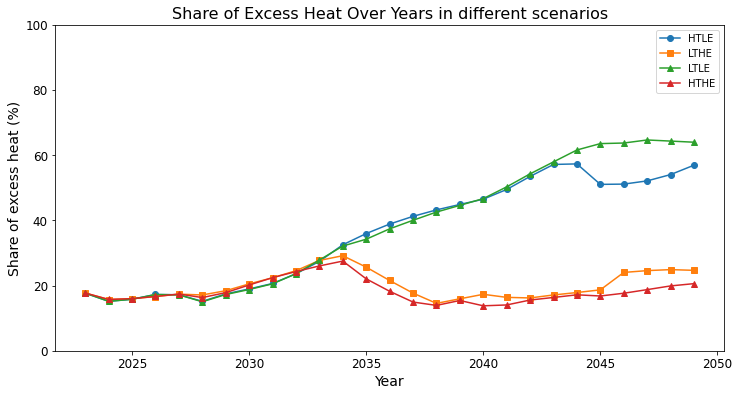

In [3]:
plt.figure(figsize=(12, 6))

# Plot each line
plt.plot(Plotdf['Year'], Plotdf['HTLE'] * 100, marker='o', label='HTLE', linestyle='-')
plt.plot(Plotdf['Year'], Plotdf['LTHE'] * 100, marker='s', label='LTHE', linestyle='-')
plt.plot(Plotdf['Year'], Plotdf['LTLE'] * 100, marker='^', label='LTLE', linestyle='-')
plt.plot(Plotdf['Year'], Plotdf['HTHE'] * 100, marker='^', label='HTHE', linestyle='-')

# Set labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Share of excess heat (%)', fontsize=14)
plt.title('Share of Excess Heat Over Years in different scenarios', fontsize=16)

# Set the font size for ticks
plt.xticks(fontsize=12)  # Change 12 to your desired font size
plt.yticks(fontsize=12)  # Change 12 to your desired font size

# Set y-axis limit if necessary
plt.ylim(0, 100)  # Adjust y-axis limit to fit percentages

# Add a legend
plt.legend()

plt.savefig('Share of excess heat.png', format='png', dpi=800, bbox_inches='tight')
# Show plot
plt.show()

In [4]:
from PIL import Image

# List of file paths for each image
image_files = ["PBTA_LTLE.jpg", "PBTA_HTLE.jpg", "PBTA_LTHE.jpg", "PBTA_HTHE.jpg"]

# Open each image and store it in a list
images = [Image.open(img) for img in image_files]

# Assume all images are the same size (for simplicity)
img_width, img_height = images[0].size

# Create a blank canvas for the 2x2 grid
grid_width = 2 * img_width
grid_height = 2 * img_height
grid_img = Image.new("RGB", (grid_width, grid_height))

# Paste each image into the grid
for i, img in enumerate(images):
    x = (i % 2) * img_width       # Calculate x position (0 or 1)
    y = (i // 2) * img_height      # Calculate y position (0 or 1)
    grid_img.paste(img, (x, y))

# Save or display the combined grid image
grid_img.save("pbta_combined.png")
grid_img.show()

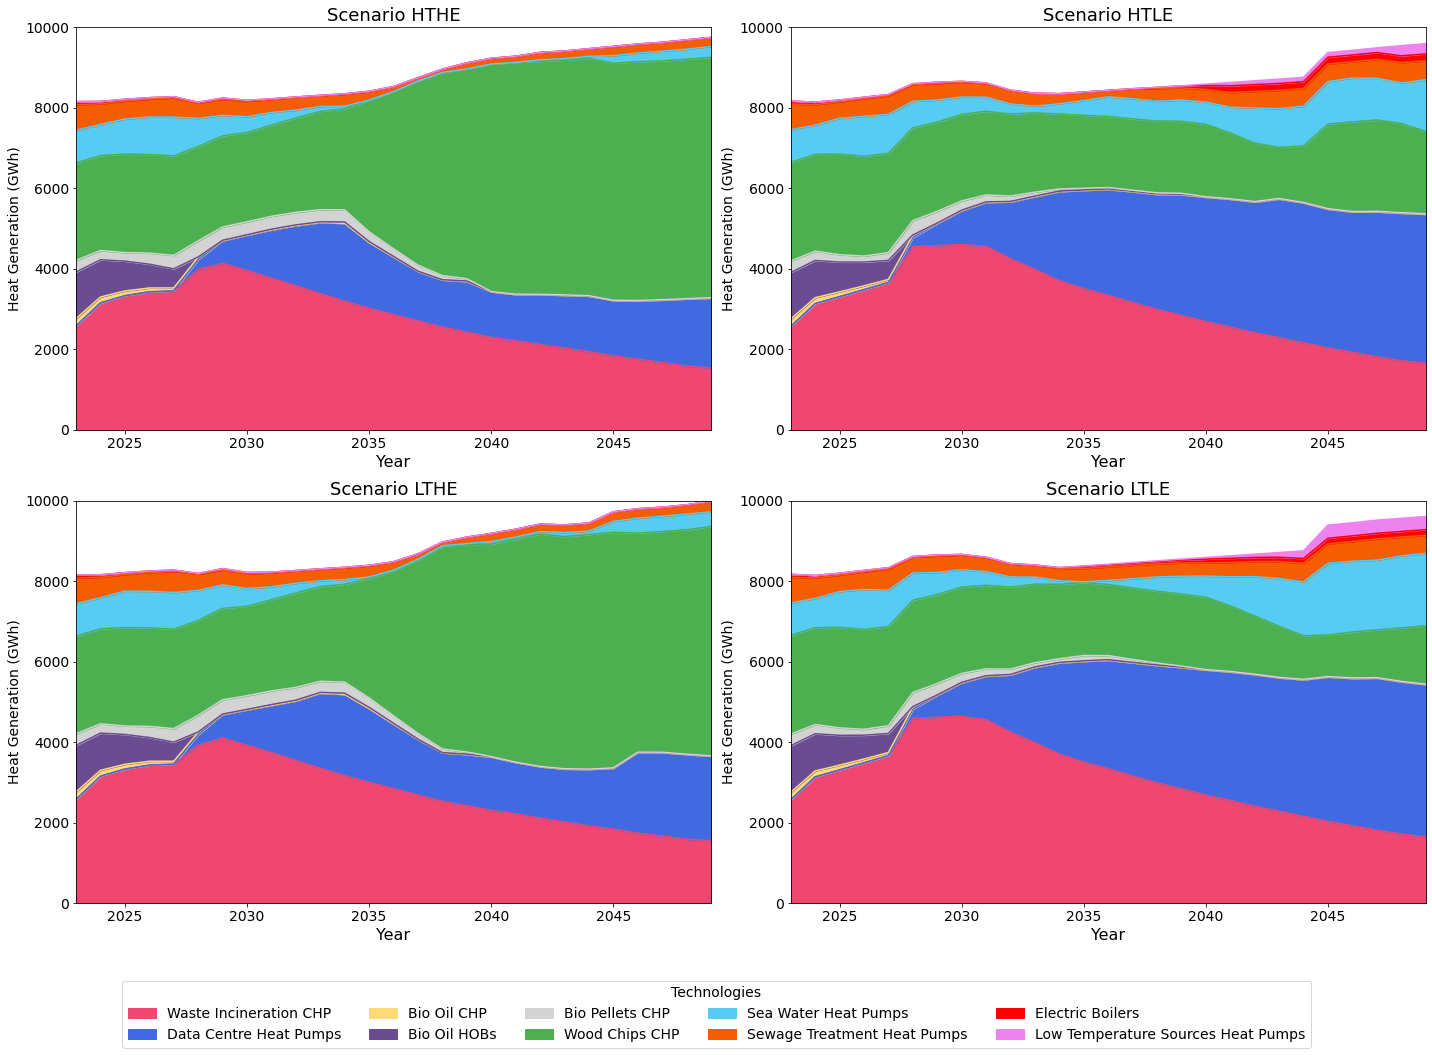

In [5]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Prod_by_tech_ann'
Plotdf = pd.DataFrame()
Plotdf['Year'] = range(2023, 2049) 

# List all files in the directory
file_names = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]
area_data = []  # To store area plot data for each scenario

for i in file_names:  # Limit to the first 3 area plots for a 2x2 grid layout
    if '.xlsx' in i:
        PBTA = pd.read_excel(os.path.join(directory_path, i))
        PBTA = PBTA.loc[PBTA['FUEL'].str.contains('CONVHEAT', case=False, na=False)]
        PBTA = PBTA[~PBTA['TECHNOLOGY'].str.contains('DHN')]
        
        # Pivot the data
        pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
        pivot_PBTA = (pivot_PBTA * 0.27777778).round(0)
        pivot_PBTA_reset = pivot_PBTA.reset_index()
        pivot_PBTA_reset['Share of Excess heat'] = (
            pivot_PBTA_reset[['DCACC', 'HmrbySEWHP', 'SEWACC', 'SUPACC', 'VVNHP']].sum(axis=1) /
            pivot_PBTA_reset.drop(columns=['YEAR'], errors='ignore').sum(axis=1)
        )
        
        # Update Plotdf with Share of Excess heat for each scenario
        j = re.sub('ProdByTechAnn_', '', i, flags=re.IGNORECASE)
        j = re.sub('.xlsx', '', j, flags=re.IGNORECASE)
        Plotdf[j] = pivot_PBTA_reset['Share of Excess heat']
        
        # Prepare grouped data
        Names = {
            'Waste Incineration CHP': ['BristaB2', 'HgldP3468', 'LSVTACHP'],
            'Data Centre Heat Pumps': ['DCACC'],
            'Bio Oil CHP': ['KVV1'],
            'Bio Oil HOBs': ['DECFOHOB', 'CSBOHOB'],
            'Bio Pellets CHP': ['HslbyP1toP3'],
            'Wood Chips CHP': ['BristaB1', 'KVV8'],
            'Sea Water Heat Pumps': ['VVNHP'],
            'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
            'Electric Boilers': ['VVHVELHOB'],
            'Low Temperature Sources Heat Pumps': ['SUPACC'],
            'Year': ['YEAR']
        }

        grouped_data = {}
        for category, columns in Names.items():
            grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1, skipna=True)
        
        grouped_df = pd.DataFrame(grouped_data)
        grouped_df['Year'] = pivot_PBTA_reset['YEAR']
        grouped_df.loc[grouped_df.index[-5:], 'Data Centre Heat Pumps'] *= (1.2)
        grouped_df.set_index('Year', inplace=True)
        area_data.append((grouped_df, j))  # Store data and scenario name

# Define colors
technology_colors5 = {
    'Electric Boilers': '#FF0000',          
    'Data Centre Heat Pumps': '#4169E1',    
    'Bio Oil CHP': '#FFDA79',               
    'Bio Oil HOBs': '#6A4C93',              
    'Bio Pellets CHP': '#D3D3D3',           
    'Sea Water Heat Pumps': '#56CCF2',      
    'Sewage Treatment Heat Pumps': '#F45D01',
    'Low Temperature Sources Heat Pumps': '#EE82EE',
    'Waste Incineration CHP': '#EF476F',    
    'Wood Chips CHP': '#4CAF50'             
}

# Create a larger 2x2 grid for plots
fig = plt.figure(figsize=(20, 14))  # Increase the overall figure size
gs = GridSpec(2, 2, figure=fig)

# Plot each area graph in the 2x2 layout
for i, (grouped_df, scenario_name) in enumerate(area_data):
    ax = fig.add_subplot(gs[i // 2, i % 2])  # Place plots in 2x2 grid
    grouped_df.plot(kind='area', stacked=True, ax=ax, color=[technology_colors5[tech] for tech in grouped_df.columns if tech in technology_colors5])
    ax.set_title(f'Scenario {scenario_name}', fontsize=18)  # Increase title font size
    ax.set_xlabel('Year', fontsize=16)  # Increase x-axis label font size
    ax.set_ylabel('Heat Generation (GWh)', fontsize=14)  # Increase y-axis label font size
    ax.tick_params(axis='both', labelsize=14)  # Increase axis numbers size
    ax.set_ylim(0, 10000)  # Set y-axis limits
    ax.set_xlim(2023, 2049)  # Set y-axis limits
    ax.legend().remove()

# Add a single legend at the bottom
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=5, title='Technologies', title_fontsize=14, fontsize=14, bbox_to_anchor=(0.5, -0.05))  # Position the legend below the plots

# Adjust layout to avoid overlap with the legend
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust the layout to make space for the legend

plt.savefig('Combined_2x2_Grid_Plots_full.png', dpi=800)
plt.show()





In [6]:
PBTA 

,NAME,VALUE,SCENARIO,REGION,REGION2,DAYTYPE,FUEL,EMISSION,DAILYTIMEBRACKET,SEASON,TIMESLICE,MODE_OF_OPERATION,STORAGE,TECHNOLOGY,YEAR,PARAM,REGION_x,REGION_y
0,ProdByTechAnn,2340.027216,0,NaN,0,0,CONVHEATNV,0,0,0,90300,900,NaN,BristaB1,2023,NaN,NaN,NaN
2,ProdByTechAnn,2197.824174,0,NaN,0,0,CONVHEATNV,0,0,0,90300,900,NaN,BristaB2,2023,NaN,NaN,NaN
4,ProdByTechAnn,1162.800000,0,NaN,0,0,CONVHEATCS,0,0,0,45150,300,NaN,CSBOHOB,2023,NaN,NaN,NaN
6,ProdByTechAnn,0.000000,0,NaN,0,0,CONVHEAT,0,0,0,45150,300,NaN,DCACC,2023,NaN,NaN,NaN
7,ProdByTechAnn,3002.400000,0,NaN,0,0,CONVHEATNV,0,0,0,45150,300,NaN,DECFOHOB,2023,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8576,ProdByTechAnn,461.088783,0,NaN,0,0,CONVHEAT,0,0,0,90300,900,NaN,LSVTACHP,2049,NaN,NaN,NaN
8879,ProdByTechAnn,78.989697,0,NaN,0,0,CONVHEAT,0,0,0,45150,300,NaN,SEWACC,2049,NaN,NaN,NaN
8880,ProdByTechAnn,1177.478037,0,NaN,0,0,CONVHEAT,0,0,0,45150,300,NaN,SUPACC,2049,NaN,NaN,NaN
8881,ProdByTechAnn,503.983727,0,NaN,0,0,CONVHEATCS,0,0,0,45150,300,NaN,VVHVELHOB,2049,NaN,NaN,NaN


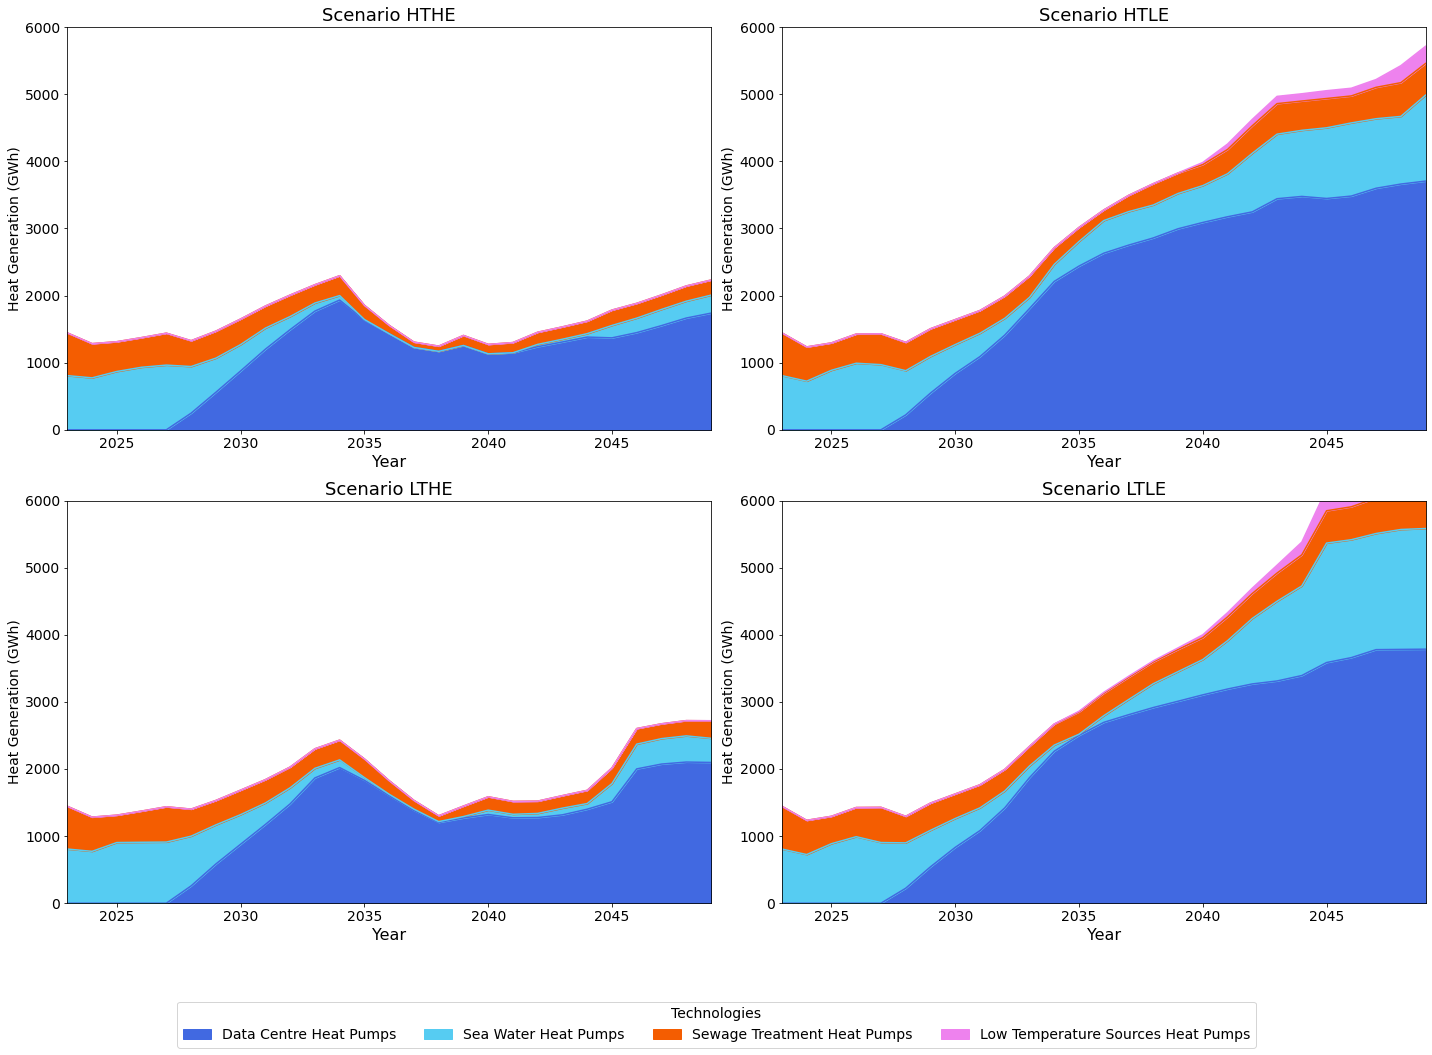

In [7]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Prod_by_tech_ann'
Plotdf = pd.DataFrame()
Plotdf['Year'] = range(2023, 2049) 

# List all files in the directory
file_names = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]
area_data = []  # To store area plot data for each scenario

for i in file_names:  # Limit to the first 3 area plots for a 2x2 grid layout
    if '.xlsx' in i:
        PBTA = pd.read_excel(os.path.join(directory_path, i))
        PBTA = PBTA.loc[PBTA['FUEL'].str.contains('CONVHEAT', case=False, na=False)]
        PBTA = PBTA[~PBTA['TECHNOLOGY'].str.contains('DHN')]
        
        # Pivot the data
        pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
        pivot_PBTA = (pivot_PBTA * 0.27777778).round(0)
        pivot_PBTA_reset = pivot_PBTA.reset_index()
        pivot_PBTA_reset['Share of Excess heat'] = (
            pivot_PBTA_reset[['DCACC', 'HmrbySEWHP', 'SEWACC', 'SUPACC', 'VVNHP']].sum(axis=1) /
            pivot_PBTA_reset.drop(columns=['YEAR'], errors='ignore').sum(axis=1)
        )
        
        # Update Plotdf with Share of Excess heat for each scenario
        j = re.sub('ProdByTechAnn_', '', i, flags=re.IGNORECASE)
        j = re.sub('.xlsx', '', j, flags=re.IGNORECASE)
        Plotdf[j] = pivot_PBTA_reset['Share of Excess heat']
        
        # Prepare grouped data
        Names = {
            'Data Centre Heat Pumps': ['DCACC'],
            'Sea Water Heat Pumps': ['VVNHP'],
            'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
            'Low Temperature Sources Heat Pumps': ['SUPACC'],
            'Year': ['YEAR']
        }

        grouped_data = {}
        for category, columns in Names.items():
            grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1, skipna=True)
        
        grouped_df = pd.DataFrame(grouped_data)
        grouped_df['Year'] = pivot_PBTA_reset['YEAR']
        grouped_df.set_index('Year', inplace=True)
        grouped_df.loc[grouped_df.index[-5:], 'Data Centre Heat Pumps'] *= (1.2)
        area_data.append((grouped_df, j))  # Store data and scenario name

# Define colors
technology_colors5 = {
    'Electric Boilers': '#FF0000',          
    'Data Centre Heat Pumps': '#4169E1',    
    'Bio Oil CHP': '#FFDA79',               
    'Bio Oil HOBs': '#6A4C93',              
    'Bio Pellets CHP': '#D3D3D3',           
    'Sea Water Heat Pumps': '#56CCF2',      
    'Sewage Treatment Heat Pumps': '#F45D01',
    'Low Temperature Sources Heat Pumps': '#EE82EE',
    'Waste Incineration CHP': '#EF476F',    
    'Wood Chips CHP': '#4CAF50'             
}

# Create a larger 2x2 grid for plots
fig = plt.figure(figsize=(20, 14))  # Increase the overall figure size
gs = GridSpec(2, 2, figure=fig)

# Plot each area graph in the 2x2 layout
for i, (grouped_df, scenario_name) in enumerate(area_data):
    ax = fig.add_subplot(gs[i // 2, i % 2])  # Place plots in 2x2 grid
    grouped_df.plot(kind='area', stacked=True, ax=ax, color=[technology_colors5[tech] for tech in grouped_df.columns if tech in technology_colors5])
    ax.set_title(f'Scenario {scenario_name}', fontsize=18)  # Increase title font size
    ax.set_xlabel('Year', fontsize=16)  # Increase x-axis label font size
    ax.set_ylabel('Heat Generation (GWh)', fontsize=14)  # Increase y-axis label font size
    ax.tick_params(axis='both', labelsize=14)  # Increase axis numbers size
    ax.set_ylim(0, 6000)  # Set y-axis limits
    ax.set_xlim(2023, 2049)  # Set y-axis limits
    ax.legend().remove()

# Add a single legend at the bottom
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=5, title='Technologies', title_fontsize=14, fontsize=14, bbox_to_anchor=(0.5, -0.05))  # Position the legend below the plots

# Adjust layout to avoid overlap with the legend
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust the layout to make space for the legend

plt.savefig('Combined_2x2_Grid_Plots_UEH.png', dpi=800)
plt.show()


In [8]:
pivot_PBTA

TECHNOLOGY,BristaB1,BristaB2,CSBOHOB,DCACC,DECFOHOB,HgldP3468,HmrbySEWHP,HslbyP1toP3,KVV1,KVV8,LSVTACHP,SEWACC,SUPACC,VVHVELHOB,VVNHP
YEAR,,,,,,,,,,,,,,,
2023,650.0,611.0,323.0,0.0,834.0,1957.0,637.0,288.0,184.0,1803.0,0.0,0.0,0.0,76.0,807.0
2024,546.0,739.0,258.0,0.0,667.0,2398.0,510.0,230.0,147.0,1859.0,0.0,0.0,0.0,61.0,725.0
2025,580.0,825.0,207.0,0.0,534.0,2486.0,408.0,184.0,118.0,1919.0,0.0,0.0,0.0,49.0,887.0
2026,578.0,911.0,165.0,0.0,427.0,2576.0,435.0,147.0,94.0,1903.0,0.0,0.0,0.0,39.0,991.0
2027,576.0,998.0,132.0,0.0,342.0,2668.0,525.0,192.0,75.0,1889.0,0.0,0.0,0.0,31.0,904.0
2028,485.0,1002.0,5.0,223.0,5.0,3379.0,396.0,348.0,60.0,1810.0,209.0,0.0,0.0,15.0,676.0
2029,416.0,966.0,5.0,542.0,6.0,3446.0,406.0,284.0,0.0,1797.0,208.0,0.0,0.0,28.0,544.0
2030,355.0,920.0,5.0,832.0,7.0,3510.0,366.0,222.0,0.0,1789.0,212.0,0.0,0.0,15.0,430.0
2031,297.0,784.0,6.0,1082.0,5.0,3562.0,344.0,169.0,0.0,1780.0,212.0,0.0,0.0,14.0,339.0


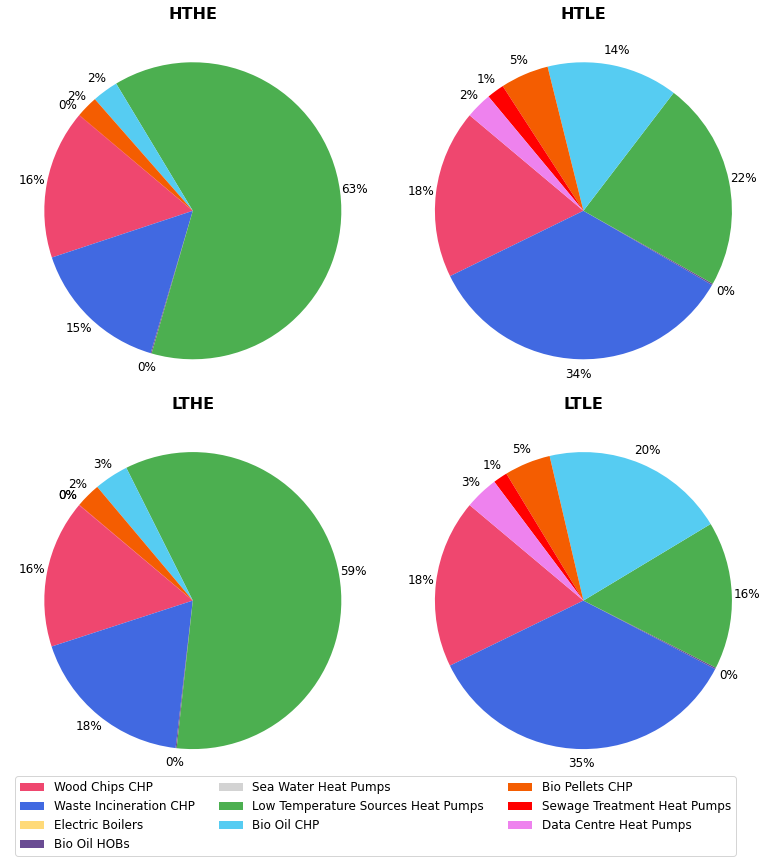

In [50]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# Define directory path
directory_path = r'C:\Users\skpk\OneDrive - KTH\OSeMOSYS_PULP_Short\SRC\Results\Prod_by_tech_ann'
Plotdf = pd.DataFrame()
Plotdf['Year'] = range(2023, 2050)

# List all files in the directory (assuming Excel files)
file_names = [file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file)) and '.xlsx' in file]

# Dictionary for color mapping of the technologies
technology_colors5 = {
    'Electric Boilers': '#FF0000',          # Coral Red
    'Data Centre Heat Pumps': '#4169E1',    # Turquoise
    'Bio Oil CHP': '#FFDA79',               # Bright Yellow
    'Bio Oil HOBs': '#6A4C93',              # Vivid Purple
    'Bio Pellets CHP': '#D3D3D3',           # Peach Orange
    'Sea Water Heat Pumps': '#56CCF2',      # Bright Sky Blue
    'Sewage Treatment Heat Pumps': '#F45D01', # Bright Orange
    'Low Temperature Sources Heat Pumps': '#EE82EE',  # Pale Green
    'Waste Incineration CHP': '#EF476F',    # Pinkish Red
    'Wood Chips CHP': '#4CAF50'             # Bright Mint Green
}

# Grouping names for technologies
Names = {
    'Waste Incineration CHP': ['BristaB2', 'HgldP3468', 'LSVTACHP'],
    'Data Centre Heat Pumps': ['DCACC'],
    'Bio Oil CHP': ['KVV1'],
    'Bio Oil HOBs': ['DECFOHOB', 'CSBOHOB'],
    'Bio Pellets CHP': ['HslbyP1toP3'],
    'Wood Chips CHP': ['BristaB1', 'KVV8'],
    'Sea Water Heat Pumps': ['VVNHP'],
    'Sewage Treatment Heat Pumps': ['HmrbySEWHP'],
    'Electric Boilers': ['VVHVELHOB'],
    'Low Temperature Sources Heat Pumps': ['SUPACC'],
    'Year': ['YEAR'],
}

# Initialize a 2x2 subplot grid with larger pies
fig, axs = plt.subplots(2, 2, figsize=(14, 14))  # Increase figure size for bigger pies
axs = axs.ravel()  # Flatten the array of axes

# Set of all unique labels for the final legend
all_labels = set()

# Loop over files and plot pie charts
years_of_interest = [2049]  # Define the year of interest
for idx, k in enumerate(file_names[:4]):  # Limit to 4 files for 2x2 grid
    file_path = os.path.join(directory_path, k)
    PBTA = pd.read_excel(file_path)

    # Filter and pivot the data
    PBTA = PBTA.loc[PBTA['FUEL'].str.contains('CONVHEAT', case=False, na=False)]
    PBTA = PBTA[~PBTA['TECHNOLOGY'].str.contains('DHN')]
    pivot_PBTA = PBTA.pivot_table(values='VALUE', index='YEAR', columns='TECHNOLOGY', aggfunc='sum')
    pivot_PBTA = (pivot_PBTA * 0.27777778).round(0)  # Convert values

    pivot_PBTA_reset = pivot_PBTA.reset_index()
    pivot_PBTA_reset.rename(columns={'index': 'Year'}, inplace=True)

    # Group data by technology categories
    grouped_data = {}
    for category, columns in Names.items():
        grouped_data[category] = pivot_PBTA_reset[columns].sum(axis=1)

    grouped_df = pd.DataFrame(grouped_data)

    # Select the year of interest
    row_data = grouped_df[grouped_df['Year'] == years_of_interest[0]].squeeze()

    # Prepare data for the pie chart
    sizes = row_data.drop('Year')
    labels = sizes.index

    # Collect all labels for the final legend
    all_labels.update(labels)

    # Function to format the pie labels
    def func(pct, allsizes):
        if pct > 0:  # Only format for positive percentages
            return f'{int(pct)}%'  # Return the percentage as an integer without decimals
        else:
            return ''  # Return empty string for zero values

    # In your pie chart plotting line, update the autopct argument
    wedges, texts, autotexts = axs[idx].pie(sizes, startangle=140,
            colors=[technology_colors5[label] for label in labels], textprops={'fontsize': 12},
            autopct=lambda pct: func(pct, sizes), pctdistance=0.85, labeldistance=1.1)

    # Position the percentage labels near the circumference
    for i, autotext in enumerate(autotexts):
        autotext.set_color('black')  # Color of the percentage text
        autotext.set_fontsize(12)  # Font size for the percentage text
        angle = (wedges[i].theta1 + wedges[i].theta2) / 2
        x = np.cos(np.deg2rad(angle)) * 1.1  # Move outward from the pie
        y = np.sin(np.deg2rad(angle)) * 1.1  # Move outward from the pie
        autotext.set_position((x, y))  # Set new position for the percentage text

    # Add title for the chart
    j = re.sub('ProdByTechAnn_|.xlsx', '', k, flags=re.IGNORECASE)
    axs[idx].set_title(f'{j}', fontsize=16, fontweight='bold')

# Adjust layout to make pies bigger and space for the legend
plt.subplots_adjust(hspace=0.05, wspace=0)

# Create a single legend for all subplots, moving it just above the bottom edge
fig.legend(all_labels, loc="lower center", ncol=3, fontsize=12, bbox_to_anchor=(0.5, 0.05))

# Show the final grid of pie charts
plt.show()


In [12]:
del pivot_PBTA_reset[]

KeyError: 'TECHNOLOGY'